# Median Blur: Remover ruídos das imagens (sal e pimenta)

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
path_image = '../data/raw/hand_xray.jpeg'
image = cv2.imread(path_image, cv2.IMREAD_GRAYSCALE)

Adicionando ruído

In [6]:
noisy_image = image.copy()
#Pegamos 5% dos pixels e transformamos metade em branco e metade em preto
num_pixel = noisy_image.size
num_salt = int(0.05 * num_pixel / 2)
num_pepper = int(0.05 * num_pixel / 2)

#Coordenadas aleatórias para o "sal"
salt_coords = [np.random.randint(0, i - 1, num_salt) for i in noisy_image.shape]
noisy_image[salt_coords[0], salt_coords[1]] = 255

#Coordenada para a "pimenta"
pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in noisy_image.shape]
noisy_image[pepper_coords[0], pepper_coords[1]] = 0

REMOVENDO RUIDO USANDO MEDIANBLUR

In [7]:
denoised_image = cv2.medianBlur(noisy_image, ksize= 5)
#5 é o tamanho do número da lente

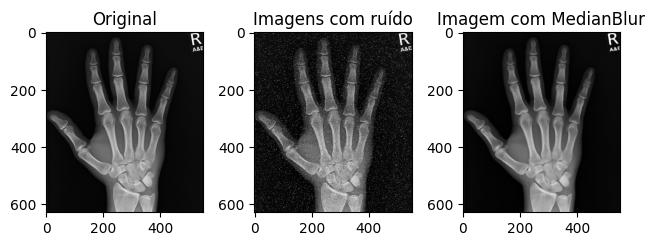

In [10]:
plt.Figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Imagens com ruído')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Imagem com MedianBlur')

plt.tight_layout()
plt.show()

# SHARPERING: FILTRO DE NITIDEZ

In [11]:
kernel_sharpering = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
#multiplica o pixel central por 5 e subtrai seus vizinhos.
#as bordas (onde os pixels são diferentes) são realçadas.

In [12]:
sharpened_image = cv2.filter2D(image, -1, kernel_sharpering)
# Usamos a função filter2D para aplicar um kernel customizado.
# O -1 significa que a imagem de saída terá a mesma profundidade de cor da original.

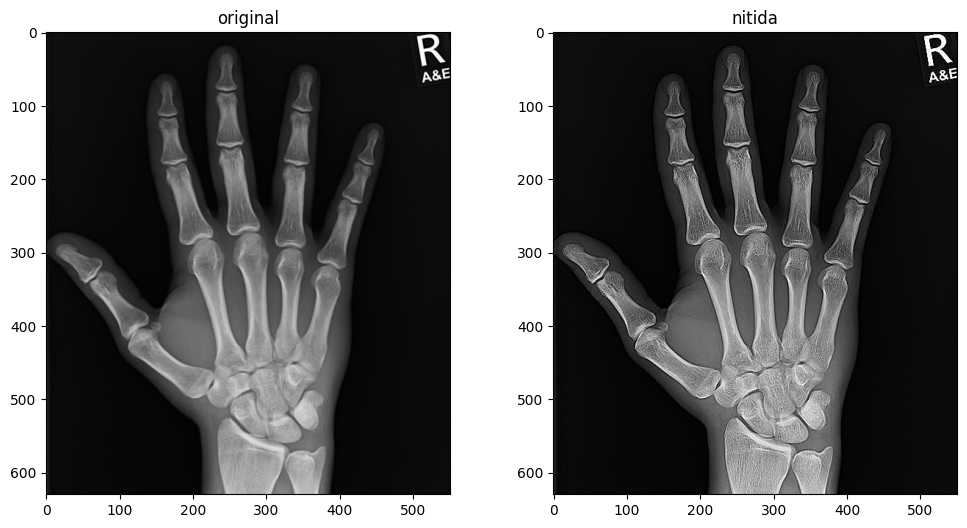

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('nitida')

plt.show()